In [64]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# feel free to add more if you need

Read Data

In [65]:
pd.set_option('display.max_columns', None)
data = pd.read_csv("HW4_data.csv", sep="\t")
print("Number of datapoints:", len(data))
data.head()

Number of datapoints: 2240


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


Data Description

1. Customor Information: <br>
<br>
ID: Customer's unique identifier <br>
Year_Birth: Customer's birth year <br>
Education: Customer's education level <br>
Marital_Status: Customer's marital status <br>
Income: Customer's yearly household income <br>
Kidhome: Number of children in customer's household <br>
Teenhome: Number of teenagers in customer's household <br>
Dt_Customer: Date of customer's enrollment with the company <br>
Recency: Number of days since customer's last purchase <br>
Complain: 1 if the customer complained in the last 2 years, 0 otherwise <br>

2. Product Information <br>
<br>
MntWines: Amount spent on wine in last 2 years <br>
MntFruits: Amount spent on fruits in last 2 years <br>
MntMeatProducts: Amount spent on meat in last 2 years <br>
MntFishProducts: Amount spent on fish in last 2 years <br>
MntSweetProducts: Amount spent on sweets in last 2 years <br>
MntGoldProds: Amount spent on gold in last 2 years

3. Promotion Information: <br>
<br>
NumDealsPurchases: Number of purchases made with a discount <br>
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise <br>
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise <br>
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise <br>
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise <br>
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise <br>
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

4. Channel Information: <br>
<br>
NumWebPurchases: Number of purchases made through the company’s website <br>
NumCatalogPurchases: Number of purchases made using a catalogue <br>
NumStorePurchases: Number of purchases made directly in stores <br>
NumWebVisitsMonth: Number of visits to company’s website in the last month

A quick check on the dataset

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Observations: <br>
1. missing values found in income
2. Dt_Customer that indicates the date a customer joined the database is not parsed as DateTime
3. There are some categorical features in our data, will need to encode them.

In [67]:
# Remove missing values
# since there are only a very small portion of data that is missing, we can simply remove them, but you are welcome to use other treatments.
data = data.dropna()
print("The total number of data points after removing the rows with missing values are:", len(data))

The total number of data points after removing the rows with missing values are: 2216


In [68]:
# Convert Dt_Customer to DateTime
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"], dayfirst=True)
dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

# Store the new data in "Customer_For"
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
data["Customer_For"] = days
data["Customer_For"] = pd.to_numeric(data["Customer_For"], errors="coerce")

The newest customer's enrolment date in therecords: 2014-06-29
The oldest customer's enrolment date in the records: 2012-07-30


In [69]:
# A quick check on the distribution of levels in categorical variables
print("Total categories in the feature Marital_Status:\n", data["Marital_Status"].value_counts(), "\n")
print("Total categories in the feature Education:\n", data["Education"].value_counts())

Total categories in the feature Marital_Status:
 Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64 

Total categories in the feature Education:
 Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64


In [70]:
# Rename 'Response' to 'AcceptedCmp6'
data = data.rename(columns={'Response': 'AcceptedCmp6'})

# Calculate total campaign purchases (up to 6 times)
data['TotalCampaignPurchases'] = data[
    ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
      'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp6']
].sum(axis=1)

# Feature Engineering
data['TotalSpent'] = data[[
    'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
]].sum(axis=1)

# Total purchases across channels
data['TotalPurchases'] = data[[
    'NumDealsPurchases', 'NumWebPurchases',
    'NumCatalogPurchases', 'NumStorePurchases'
]].sum(axis=1)

In [71]:
# Encode the categorical columns
le = LabelEncoder()
data['Education_Encoded'] = le.fit_transform(data['Education'])
data['Marital_Status_Encoded'] = le.fit_transform(data['Marital_Status'])

In [72]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,AcceptedCmp6,Customer_For,TotalCampaignPurchases,TotalSpent,TotalPurchases,Education_Encoded,Marital_Status_Encoded
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,57283200000000000,1,1617,25,2,4
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,9763200000000000,0,27,6,2,4
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,26956800000000000,0,776,21,2,5
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,12009600000000000,0,53,8,2,5
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,13910400000000000,0,422,19,4,3


In [73]:
features_for_pca = [
        'Income', 'Customer_For', 'Recency', 'TotalSpent', 'TotalPurchases',
        'NumWebVisitsMonth', 'Education_Encoded', 'Marital_Status_Encoded'
    ]

# Standardize features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[features_for_pca])

# PCA
pca = PCA(n_components=0.90)  # Retain 90% variance
pca_transformed = pca.fit_transform(scaled_data)

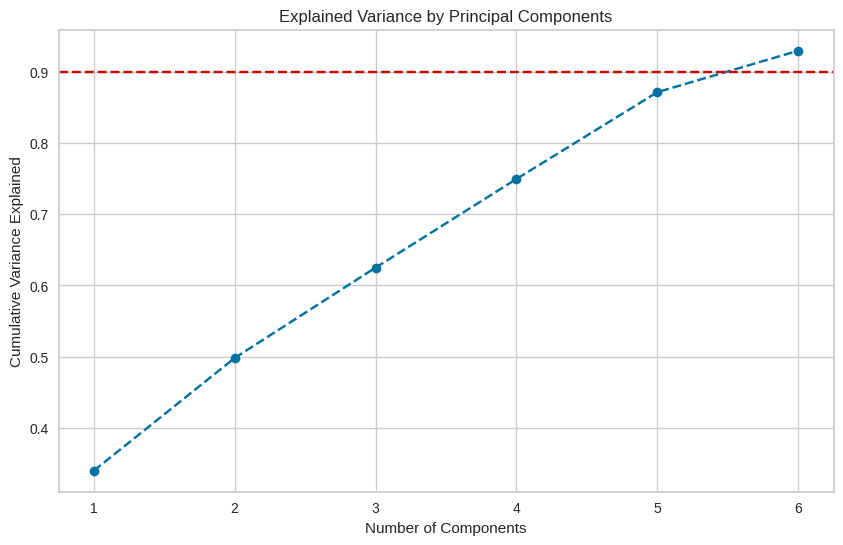

In [74]:
# graph of how many components will be needed to reach .90 variance explained
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.axhline(y=0.90, color='r', linestyle='--')
plt.show()

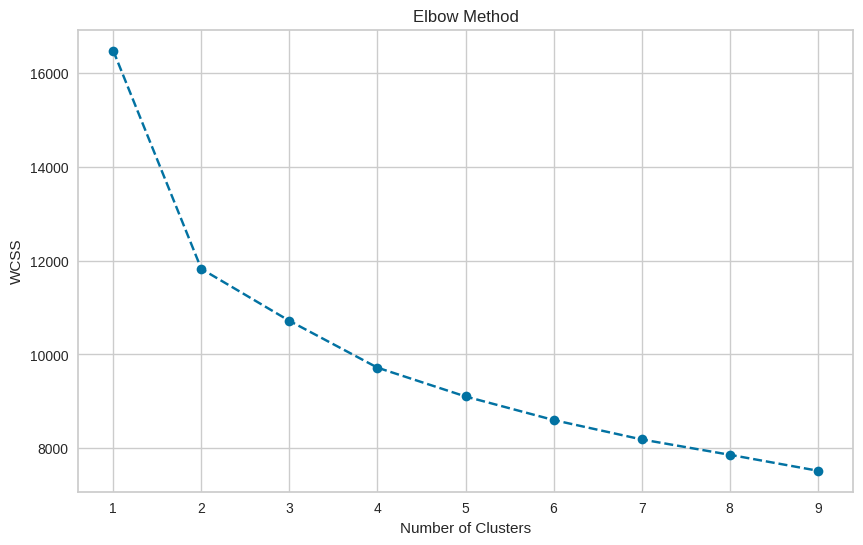

In [75]:
# Elbow Method to decide how many clusters to use
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(pca_transformed)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [76]:
# K-means clustering with optimal number of clusters
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(pca_transformed)

In [77]:
# Analyze Campaign performance
profit_per_sale = 3.67
campaign_cost_per_customer = 3.00

# Add clusters to dataframe
data['Cluster'] = clusters

# Cluster-level analysis (using whole dataset)
cluster_summary = data.groupby('Cluster').agg({
    'ID': 'count',  # Total customers in cluster
    'TotalCampaignPurchases': 'mean',
    'AcceptedCmp6': 'mean',
    'NumDealsPurchases': 'mean'
}).rename(columns={'ID': 'Total_Customers'})

# Calculate profitability
cluster_summary['Total_Profit'] = (
    cluster_summary['Total_Customers'] * cluster_summary['TotalCampaignPurchases'] * profit_per_sale - cluster_summary['Total_Customers'] * campaign_cost_per_customer
)

cluster_summary['Profit_Per_Customer'] = cluster_summary['Total_Profit'] / cluster_summary['Total_Customers']

cluster_summary['Customer_Base_Percentage'] = (
    cluster_summary['Total_Customers'] / len(data) * 100
)

cluster_summary

,Total_Customers,TotalCampaignPurchases,AcceptedCmp6,NumDealsPurchases,Total_Profit,Profit_Per_Customer,Customer_Base_Percentage
Cluster,,,,,,,
0,642,0.163551,0.049844,2.048287,-1540.65,-2.399766,28.971119
1,493,0.661258,0.233266,3.442191,-282.58,-0.573185,22.247292
2,553,0.236890,0.146474,2.497288,-1178.23,-2.130615,24.954874
3,528,0.818182,0.198864,1.431818,1.44,0.002727,23.826715


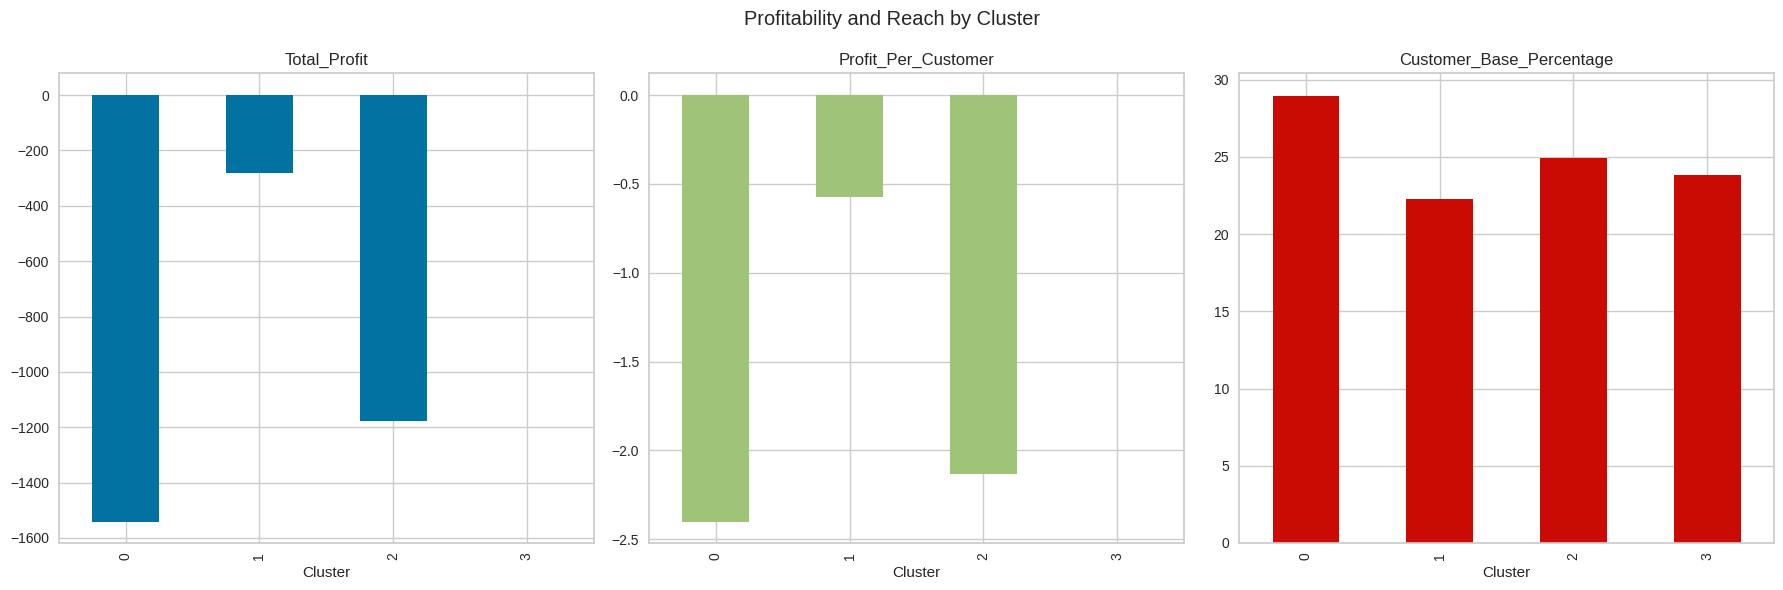

In [78]:
# Visualize the results
cluster_summary[['Total_Profit', 'Profit_Per_Customer', 'Customer_Base_Percentage']].plot(
    kind='bar', subplots=True, layout=(1, 3), figsize=(18, 6), sharex=True, legend=False
)
plt.suptitle("Profitability and Reach by Cluster")
plt.tight_layout()
plt.show()

In [79]:
# Predictive Model
features = ['Income', 'Customer_For', 'Recency', 'NumWebVisitsMonth', 'Education_Encoded', 'Marital_Status_Encoded']

X = data[features]
y = data['TotalCampaignPurchases']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and evaluation on test data
y_pred = rf_model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [91]:
# Profitability analysis
profit_per_sale = 3.67
campaign_cost = 3.00
profitability_threshold = campaign_cost / profit_per_sale

X_test_with_pred = X_test.copy()
X_test_with_pred['Predicted_Purchases'] = y_pred
X_test_with_pred['Target'] = X_test_with_pred['Predicted_Purchases'] > profitability_threshold

targeted = X_test_with_pred[X_test_with_pred['Target']]
total_profit = (targeted['Predicted_Purchases'].sum() * profit_per_sale) - (len(targeted) * campaign_cost)
profit_per_customer = total_profit / len(targeted) if len(targeted) > 0 else 0
percentage_invited = (len(targeted) / len(X_test)) * 100

print('Model_RMSE', rmse)
print('Model_R2', r2)

model_summary = {
'Total_Customers': len(X_test),
'Total_Targeted': len(targeted),
'Total_Profit': (targeted['Predicted_Purchases'].sum() * profit_per_sale) - (len(targeted) * campaign_cost),
'Profit_Per_Customer': (targeted['Predicted_Purchases'].sum() * profit_per_sale - len(targeted) * campaign_cost) / len(targeted) if len(targeted) > 0 else 0,
'Customer_Base_Percentage': (len(targeted) / len(X_test)) * 100}

print(model_summary)

Model_RMSE 0.7223485506521122
Model_R2 0.23828130054616203
{'Total_Customers': 665, 'Total_Targeted': 108, 'Total_Profit': 251.98815000000002, 'Profit_Per_Customer': 2.3332236111111113, 'Customer_Base_Percentage': 16.2406015037594}


In [89]:
# Use clustering results from step 5 to calculate similar metrics.
cluster_metrics = {
    'Total Customers': cluster_summary['Total_Customers'].sum(),
    'Total Profit': cluster_summary['Total_Profit'].sum(),
    'Profit Per Customer': cluster_summary['Profit_Per_Customer'].mean(),
    'Customer Base Percentage': cluster_summary['Customer_Base_Percentage'].mean()
}

print(f"Clustering-Based Campaign Results:")
print(cluster_metrics)

Clustering-Based Campaign Results:
{'Total Customers': 2216, 'Total Profit': -3000.02, 'Profit Per Customer': -1.2752096237002946, 'Customer Base Percentage': 25.0}
